In [43]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import kagglehub
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = kagglehub.dataset_download("zalando-research/fashionmnist")

In [20]:
df = pd.read_csv(path + "/fashion-mnist_test.csv")
df = df.astype(float)

# normalizing the data
df.iloc[:, 1:] = df.iloc[:, 1:].div(255)

labels = df['label']
df = df.drop(columns=['label'])
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


In [5]:
print(f"There are {df.label.nunique()} classes in this dataset")

There are 10 classes in this dataset


In [6]:
print(f"Dataset consists of {df.shape[0]} images, each of the dimensions {int(np.sqrt(df.shape[1]))}x{int(np.sqrt(df.shape[1]))}")

Dataset consists of 10000 images, each of the dimensions 28x28


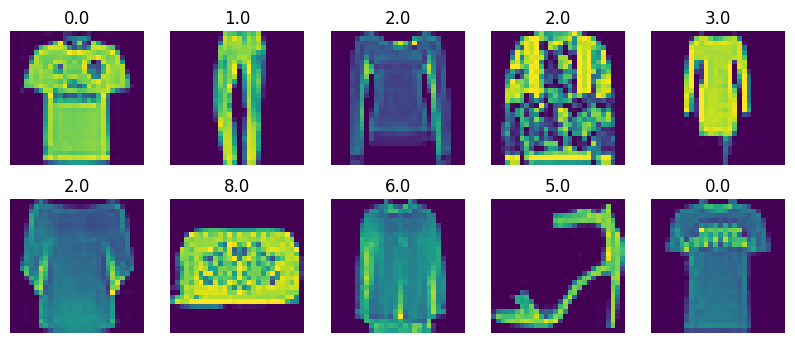

In [7]:
# plotting first 10 images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range (10):
    row = i // 5
    col = i - row * 5
    axes[row][col].axis('off')
    axes[row][col].imshow(np.reshape(df.iloc[i, 1:], (28, 28)))
    axes[row][col].set_title(df.label[i])

### Reducing data dimensionality

In [23]:
# reducing dimensionality using PCA

# flattening images
flattened_data = df.values
flattened_data = flattened_data.reshape(-1, 28 * 28)
flattened_data = pd.DataFrame(flattened_data)

In [24]:
print(flattened_data.shape)

(10000, 784)


In [25]:
scaler = StandardScaler()
scaler.fit_transform(flattened_data)

array([[-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       ...,
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
         0.0496505 , -0.03392051],
       [-0.01633211,  1.88456549,  1.18190658, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051]])

In [27]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flattened_data)

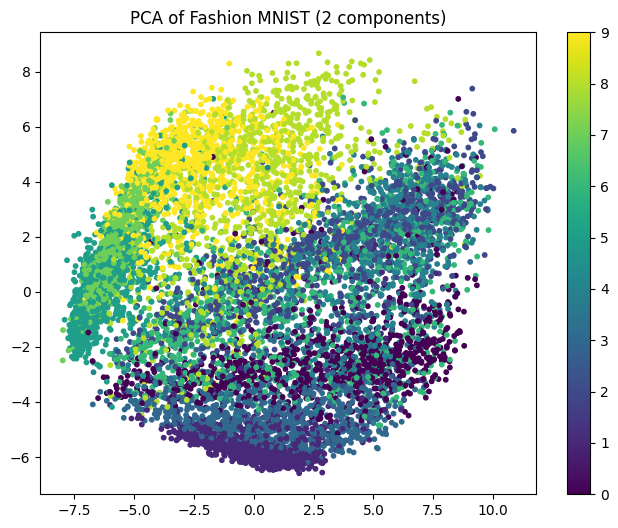

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar()
plt.title('PCA of Fashion MNIST (2 components)')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(flattened_data)
cluster_labels = kmeans.labels_

In [35]:
# now I'm evaluating clustering score with the true labels using Adjusted Rand Index 
ari_score = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted rand score: {ari_score}")

Adjusted rand score: 0.09945358139702615


In [36]:
# In this step I'm identifying outliers based on distances from the cluster centroids
distances = np.linalg.norm(flattened_data.values - kmeans.cluster_centers_[cluster_labels], axis=1)

In [37]:
threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

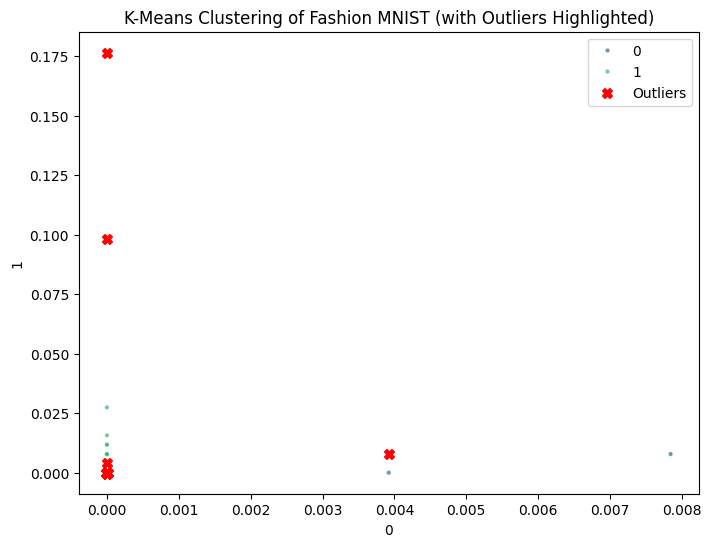

In [42]:
# Visualize the clustering results and outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=flattened_data.iloc[:, 0], y=flattened_data.iloc[:, 1], hue=cluster_labels, palette='viridis', s=10, alpha=0.7);
# Highlight outliers
plt.scatter(flattened_data.iloc[outliers, 0], flattened_data.iloc[outliers, 1], color='red', label='Outliers', s=50, marker='X')

plt.title('K-Means Clustering of Fashion MNIST (with Outliers Highlighted)')
plt.legend()
plt.show()


In [45]:
X_train, X_test, y_train, y_test = train_test_split(flattened_data, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Test set size: 2000 samples


Accuracy: 0.8615

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       192
         1.0       0.99      0.95      0.97       192
         2.0       0.74      0.79      0.76       212
         3.0       0.85      0.93      0.89       205
         4.0       0.78      0.86      0.82       204
         5.0       0.95      0.96      0.96       193
         6.0       0.70      0.51      0.59       200
         7.0       0.92      0.93      0.92       206
         8.0       0.95      0.95      0.95       196
         9.0       0.94      0.94      0.94       200

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



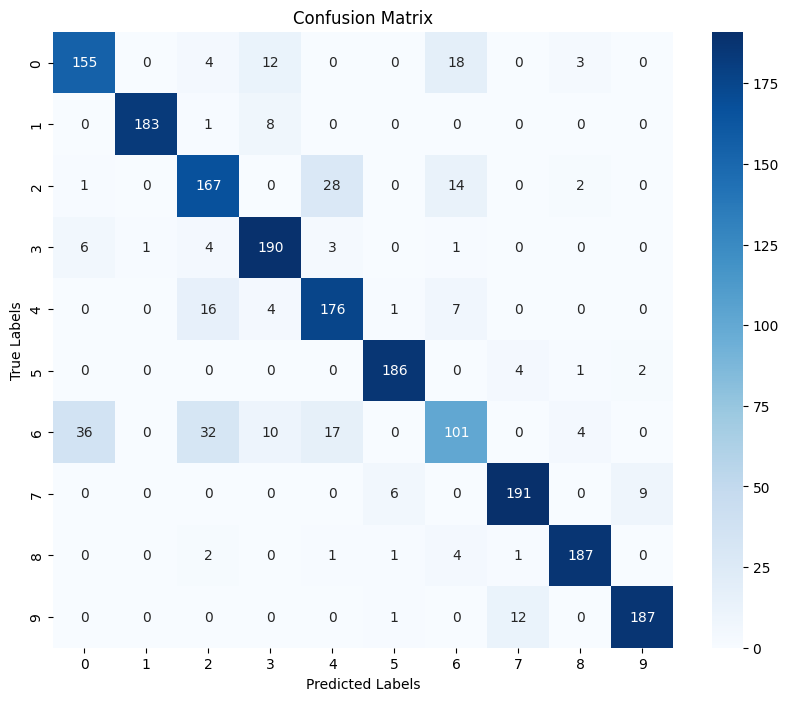

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


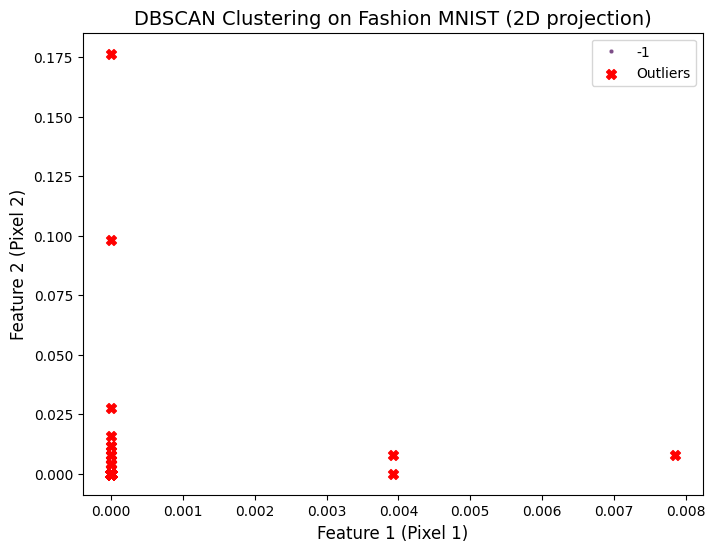

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(flattened_data)

# Visualize the DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=flattened_data.iloc[:, 0], y=flattened_data.iloc[:, 1], hue=dbscan_labels, palette='viridis', s=10, alpha=0.7)

# Labeling the axes
plt.xlabel('Feature 1 (Pixel 1)', fontsize=12)
plt.ylabel('Feature 2 (Pixel 2)', fontsize=12)

# Highlight outliers (points labeled as -1)
outliers = dbscan_labels == -1
plt.scatter(flattened_data.iloc[outliers, 0], flattened_data.iloc[outliers, 1], color='red', label='Outliers', s=50, marker='X')

plt.title('DBSCAN Clustering on Fashion MNIST (2D projection)', fontsize=14)
plt.legend()
plt.show()


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       192
         1.0       0.96      0.95      0.96       192
         2.0       0.72      0.71      0.71       212
         3.0       0.83      0.88      0.86       205
         4.0       0.77      0.80      0.78       204
         5.0       0.92      0.95      0.93       193
         6.0       0.54      0.54      0.54       200
         7.0       0.90      0.88      0.89       206
         8.0       0.94      0.93      0.93       196
         9.0       0.93      0.90      0.91       200

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [54]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)  # Linear kernel
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73       192
         1.0       0.96      0.95      0.96       192
         2.0       0.70      0.73      0.71       212
         3.0       0.86      0.87      0.87       205
         4.0       0.76      0.78      0.77       204
         5.0       0.92      0.95      0.93       193
         6.0       0.55      0.51      0.53       200
         7.0       0.92      0.91      0.91       206
         8.0       0.94      0.90      0.92       196
         9.0       0.95      0.93      0.94       200

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75       192
         1.0       0.97      0.95      0.96       192
         2.0       0.69      0.77      0.73       212
         3.0       0.89      0.83      0.86       205
         4.0       0.77      0.69      0.72       204
         5.0       0.98      0.83      0.90       193
         6.0       0.61      0.58      0.59       200
         7.0       0.85      0.94      0.89       206
         8.0       0.99      0.89      0.94       196
         9.0       0.90      0.93      0.92       200

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.83      2000
weighted avg       0.83      0.82      0.83      2000



In [56]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       192
         1.0       0.94      0.95      0.94       192
         2.0       0.61      0.59      0.60       212
         3.0       0.78      0.81      0.80       205
         4.0       0.63      0.68      0.65       204
         5.0       0.82      0.87      0.84       193
         6.0       0.44      0.40      0.42       200
         7.0       0.84      0.75      0.79       206
         8.0       0.89      0.88      0.88       196
         9.0       0.83      0.86      0.85       200

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



In [57]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       192
         1.0       0.99      0.90      0.94       192
         2.0       0.65      0.62      0.64       212
         3.0       0.69      0.93      0.80       205
         4.0       0.51      0.72      0.59       204
         5.0       0.84      0.17      0.28       193
         6.0       0.28      0.11      0.16       200
         7.0       0.60      0.95      0.73       206
         8.0       0.88      0.83      0.85       196
         9.0       0.71      0.83      0.77       200

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.65      2000
weighted avg       0.69      0.68      0.65      2000

